In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sklm
import xgboost as xgb
import matplotlib
import lightgbm as lgb

In [13]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
submissions = pd.read_csv('SampleSubmission.csv')

In [14]:
print(train.shape)
print(test.shape)

(30557, 82)
(16136, 77)


In [15]:
traincols = list(train.columns)
testcols = list(test.columns)
#print(traincols)
#print(testcols)

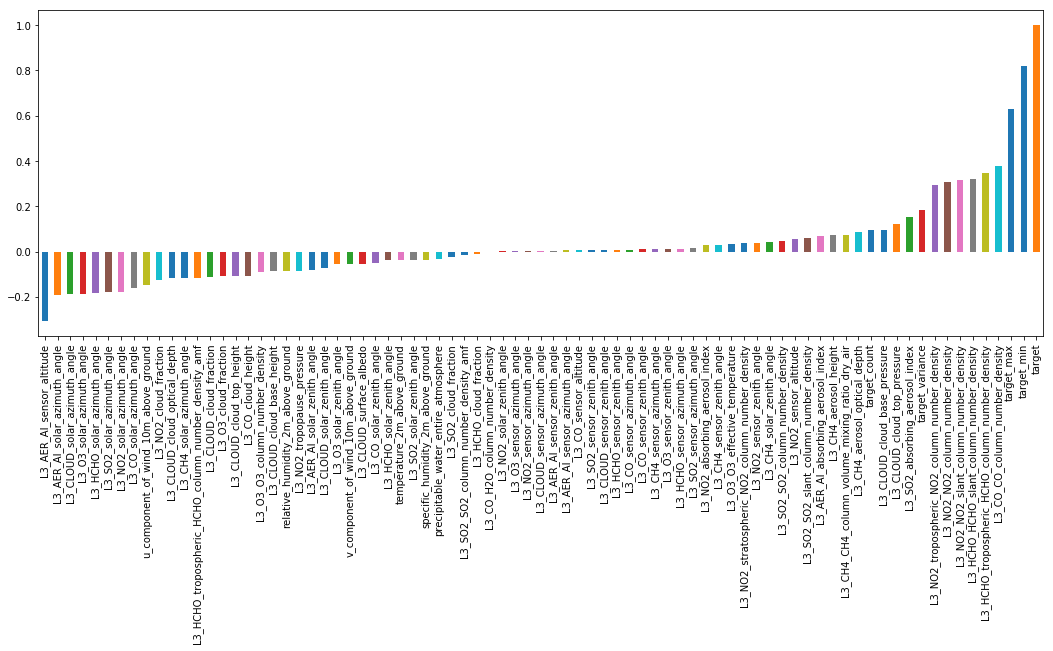

In [5]:
# Look at correlation with target
train.corr()['target'].sort_values().plot(kind='bar', figsize=(18, 6))

In [6]:
# Look at correlation with target
corr = dict(train.corr()['target'].sort_values())

In [16]:
Labels = np.array(train['target'])
print(Labels)
#train = train.drop(['target'], axis=1)

[ 38.  39.  24. ...  85. 103.  89.]


In [9]:
train = train.dropna()

In [10]:
train.shape

(3915, 82)

In [11]:
test = test.dropna()

In [12]:
test.shape

(2039, 77)

In [17]:
extracted_columns = ['relative_humidity_2m_above_ground', 'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
                     'u_component_of_wind_10m_above_ground', 'v_component_of_wind_10m_above_ground', 'L3_NO2_NO2_column_number_density',
                     'L3_NO2_NO2_slant_column_number_density', 'L3_NO2_sensor_altitude', 'L3_NO2_tropospheric_NO2_column_number_density',
                     'L3_O3_O3_column_number_density', 'L3_CO_CO_column_number_density', 'L3_CO_solar_zenith_angle', 
                    'L3_CLOUD_cloud_optical_depth', 'L3_CLOUD_surface_albedo', 'L3_AER_AI_absorbing_aerosol_index', 'L3_AER_AI_sensor_altitude']

In [18]:
for i in testcols:
    if i not in extracted_columns:
        test = test.drop(i, axis=1)
for j in traincols:
    if j not in extracted_columns:
        train = train.drop(j, axis=1)

In [19]:
print(train.shape)
print(test.shape)

(30557, 16)
(16136, 16)


In [20]:
Features = np.array(train)
test_enc = np.array(test)

import numpy.random as nr
import sklearn.model_selection as ms
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.2)
x_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [ ]:
xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators = 2000, seed = 123, max_depth = 16,
                           learning_rate=0.01, booster = 'dart', base_score = 0.7, subsample = 0.8,
                           reg_lambda = 0.03)

eval_set = [(x_test, y_test)]
xg_reg.fit(x_train, y_train, eval_metric="rmse", eval_set=eval_set, verbose=True, early_stopping_rounds = 30)

[0]	validation_0-rmse:75.63324
Will train until validation_0-rmse hasn't improved in 30 rounds.
[1]	validation_0-rmse:75.03400
[2]	validation_0-rmse:74.43108
[3]	validation_0-rmse:73.84785
[4]	validation_0-rmse:73.25293
[5]	validation_0-rmse:72.67499
[6]	validation_0-rmse:72.10749
[7]	validation_0-rmse:71.54403
[8]	validation_0-rmse:70.98126
[9]	validation_0-rmse:70.42758
[10]	validation_0-rmse:69.87885
[11]	validation_0-rmse:69.33593
[12]	validation_0-rmse:68.80844
[13]	validation_0-rmse:68.27859
[14]	validation_0-rmse:67.75498
[15]	validation_0-rmse:67.24005
[16]	validation_0-rmse:66.72538
[17]	validation_0-rmse:66.21999
[18]	validation_0-rmse:65.72778
[19]	validation_0-rmse:65.23956
[20]	validation_0-rmse:64.75999
[21]	validation_0-rmse:64.27634
[22]	validation_0-rmse:63.80668
[23]	validation_0-rmse:63.34757
[24]	validation_0-rmse:62.88849
[25]	validation_0-rmse:62.44004
[26]	validation_0-rmse:61.99333
[27]	validation_0-rmse:61.55801
[28]	validation_0-rmse:61.12666
[29]	validation_0

[250]	validation_0-rmse:31.76815
[251]	validation_0-rmse:31.75211
[252]	validation_0-rmse:31.73900
[253]	validation_0-rmse:31.72375
[254]	validation_0-rmse:31.70974
[255]	validation_0-rmse:31.69761
[256]	validation_0-rmse:31.68587
[257]	validation_0-rmse:31.67240
[258]	validation_0-rmse:31.66016
[259]	validation_0-rmse:31.64845
[260]	validation_0-rmse:31.63674
[261]	validation_0-rmse:31.62465
[262]	validation_0-rmse:31.61500
[263]	validation_0-rmse:31.60453
[264]	validation_0-rmse:31.59233
[265]	validation_0-rmse:31.58072
[266]	validation_0-rmse:31.56993
[267]	validation_0-rmse:31.55792
[268]	validation_0-rmse:31.54691
[269]	validation_0-rmse:31.53746
[270]	validation_0-rmse:31.52567
[271]	validation_0-rmse:31.51566
[272]	validation_0-rmse:31.50474
[273]	validation_0-rmse:31.49410
[274]	validation_0-rmse:31.48427
[275]	validation_0-rmse:31.47457
[276]	validation_0-rmse:31.46402
[277]	validation_0-rmse:31.45514
[278]	validation_0-rmse:31.44490
[279]	validation_0-rmse:31.43579
[280]	vali

[499]	validation_0-rmse:30.78526
[500]	validation_0-rmse:30.78346
[501]	validation_0-rmse:30.78217
[502]	validation_0-rmse:30.78157
[503]	validation_0-rmse:30.78027
[504]	validation_0-rmse:30.77968
[505]	validation_0-rmse:30.77821
[506]	validation_0-rmse:30.77782
[507]	validation_0-rmse:30.77728
[508]	validation_0-rmse:30.77616
[509]	validation_0-rmse:30.77532
[510]	validation_0-rmse:30.77465
[511]	validation_0-rmse:30.77393
[512]	validation_0-rmse:30.77288
[513]	validation_0-rmse:30.77236
[514]	validation_0-rmse:30.77096
[515]	validation_0-rmse:30.77046
[516]	validation_0-rmse:30.76958
[517]	validation_0-rmse:30.76892
[518]	validation_0-rmse:30.76847
[519]	validation_0-rmse:30.76757
[520]	validation_0-rmse:30.76670
[521]	validation_0-rmse:30.76595
[522]	validation_0-rmse:30.76563
[523]	validation_0-rmse:30.76526
[524]	validation_0-rmse:30.76404
[525]	validation_0-rmse:30.76319
[526]	validation_0-rmse:30.76260
[527]	validation_0-rmse:30.76247
[528]	validation_0-rmse:30.76163
[529]	vali

[748]	validation_0-rmse:30.69560
[749]	validation_0-rmse:30.69561
[750]	validation_0-rmse:30.69526
[751]	validation_0-rmse:30.69534
[752]	validation_0-rmse:30.69525
[753]	validation_0-rmse:30.69534
[754]	validation_0-rmse:30.69522
[755]	validation_0-rmse:30.69519
[756]	validation_0-rmse:30.69513
[757]	validation_0-rmse:30.69498
[758]	validation_0-rmse:30.69478
[759]	validation_0-rmse:30.69445
[760]	validation_0-rmse:30.69463
[761]	validation_0-rmse:30.69426
[762]	validation_0-rmse:30.69421
[763]	validation_0-rmse:30.69429
[764]	validation_0-rmse:30.69418
[765]	validation_0-rmse:30.69356
[766]	validation_0-rmse:30.69373
[767]	validation_0-rmse:30.69356
[768]	validation_0-rmse:30.69369
[769]	validation_0-rmse:30.69357
[770]	validation_0-rmse:30.69336
[771]	validation_0-rmse:30.69313
[772]	validation_0-rmse:30.69294
[773]	validation_0-rmse:30.69300
[774]	validation_0-rmse:30.69288
[775]	validation_0-rmse:30.69313
[776]	validation_0-rmse:30.69289
[777]	validation_0-rmse:30.69289
[778]	vali

[997]	validation_0-rmse:30.66821
[998]	validation_0-rmse:30.66808
[999]	validation_0-rmse:30.66804
[1000]	validation_0-rmse:30.66793
[1001]	validation_0-rmse:30.66792
[1002]	validation_0-rmse:30.66798
[1003]	validation_0-rmse:30.66780
[1004]	validation_0-rmse:30.66774
[1005]	validation_0-rmse:30.66746
[1006]	validation_0-rmse:30.66736
[1007]	validation_0-rmse:30.66739
[1008]	validation_0-rmse:30.66727
[1009]	validation_0-rmse:30.66709
[1010]	validation_0-rmse:30.66690
[1011]	validation_0-rmse:30.66694
[1012]	validation_0-rmse:30.66692
[1013]	validation_0-rmse:30.66690
[1014]	validation_0-rmse:30.66681
[1015]	validation_0-rmse:30.66668
[1016]	validation_0-rmse:30.66666
[1017]	validation_0-rmse:30.66655
[1018]	validation_0-rmse:30.66644
[1019]	validation_0-rmse:30.66647
[1020]	validation_0-rmse:30.66626
[1021]	validation_0-rmse:30.66637
[1022]	validation_0-rmse:30.66625
[1023]	validation_0-rmse:30.66627
[1024]	validation_0-rmse:30.66622
[1025]	validation_0-rmse:30.66629
[1026]	validation

[1239]	validation_0-rmse:30.65432
[1240]	validation_0-rmse:30.65435
[1241]	validation_0-rmse:30.65429
[1242]	validation_0-rmse:30.65422
[1243]	validation_0-rmse:30.65418
[1244]	validation_0-rmse:30.65417
[1245]	validation_0-rmse:30.65408
[1246]	validation_0-rmse:30.65405
[1247]	validation_0-rmse:30.65403
[1248]	validation_0-rmse:30.65393
[1249]	validation_0-rmse:30.65392
[1250]	validation_0-rmse:30.65385
[1251]	validation_0-rmse:30.65381
[1252]	validation_0-rmse:30.65379
[1253]	validation_0-rmse:30.65368
[1254]	validation_0-rmse:30.65369
[1255]	validation_0-rmse:30.65360
[1256]	validation_0-rmse:30.65357
[1257]	validation_0-rmse:30.65352
[1258]	validation_0-rmse:30.65346
[1259]	validation_0-rmse:30.65345
[1260]	validation_0-rmse:30.65354
[1261]	validation_0-rmse:30.65354
[1262]	validation_0-rmse:30.65342
[1263]	validation_0-rmse:30.65332
[1264]	validation_0-rmse:30.65326
[1265]	validation_0-rmse:30.65319
[1266]	validation_0-rmse:30.65311
[1267]	validation_0-rmse:30.65297
[1268]	validat